In [104]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,029 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and d

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
my_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', my_path)
sys.path.insert(0,my_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileExistsError: ignored

In [2]:
import pandas as pd
again_df2 = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1015/again_dataset2.csv',encoding='cp949',index_col=0)

In [3]:
ppcd_df = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/ppcd_df.csv',encoding='cp949',index_col=0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
ppcd_df_15_q = ppcd_df[ppcd_df['구매일자'] > 20150000]
ppcd_df_14_q = ppcd_df[ppcd_df['구매일자'] < 20150000]

quter1 = ppcd_df_14_q[ppcd_df_14_q['구매일자'] < 20140700]
quter2 = ppcd_df_14_q[ppcd_df_14_q['구매일자'] > 20140700]
quter3 = ppcd_df_15_q[ppcd_df_15_q['구매일자'] < 20150700]
quter4 = ppcd_df_15_q[ppcd_df_15_q['구매일자'] > 20150700]

In [5]:
quter1_count = quter1.groupby(['고객번호'])[['소분류코드']].count().reset_index().rename(columns={'소분류코드':'구매물품수_1'})
quter2_count = quter2.groupby(['고객번호'])[['소분류코드']].count().reset_index().rename(columns={'소분류코드':'구매물품수_2'})
quter3_count = quter3.groupby(['고객번호'])[['소분류코드']].count().reset_index().rename(columns={'소분류코드':'구매물품수_3'})
quter4_count = quter4.groupby(['고객번호'])[['소분류코드']].count().reset_index().rename(columns={'소분류코드':'구매물품수_4'})

In [6]:
count_df = quter1_count.merge(quter2_count,how='left',on='고객번호')
count_df = count_df.merge(quter3_count,how='left',on='고객번호')
count_df = count_df.merge(quter4_count,how='left',on='고객번호')

In [7]:
count_df = count_df.fillna(0).astype(int)

In [8]:
count_df['구매물품증감_1-2'] = count_df['구매물품수_2'] - count_df['구매물품수_1']
count_df['구매물품증감_1-3'] = count_df['구매물품수_3'] - count_df['구매물품수_1'] 
count_df['구매물품증감_2-3'] = count_df['구매물품수_3'] - count_df['구매물품수_2']

In [76]:
donut_df = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1016/donut1개_gap.csv',encoding='cp949',index_col=0)

In [77]:
donut_df

,고객번호,성별,연령대,구매금액_1P,구매금액_1P_A,구매금액_1P_B,구매금액_1P_C,구매금액_1P_D,가구/가전/전자기기_1P,기타_1P,생활/건강_1P,식품_1P,의류/잡화_1P,반려/취미/문구/도서_1P,스포츠/레저/자동차_1P,출산유아동_1P,방문횟수_1P,중분류갯수_1P,상위10%물품_1P,구매변동_1-2,구매변동_1-3
0,1,1,5,0,0,0,2,0,2,0,1,-2,0,0,0,0,0,1,0,0,1
1,2,1,5,0,0,0,0,0,0,0,0,-1,0,0,0,-4,0,0,0,1,0
2,3,1,5,0,-1,1,0,0,1,0,0,0,0,0,0,0,0,0,-1,0,1
3,4,0,5,0,0,0,-1,0,5,3,0,-1,-2,0,2,1,-1,1,0,1,1
4,5,1,5,-1,-1,-1,0,0,3,-3,-2,-1,-1,0,0,0,-1,0,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,19356,0,3,0,1,1,3,0,1,1,0,1,1,0,1,0,1,2,0,0,0
19143,19357,0,3,1,0,2,1,0,1,1,1,1,1,1,1,4,1,2,1,0,0
19144,19359,1,4,0,0,0,4,0,0,0,0,1,1,0,0,0,2,1,1,0,0
19145,19360,0,3,0,1,1,0,0,1,3,2,0,1,0,1,0,1,1,0,0,0


In [79]:
sample_df = donut_df[['고객번호','구매변동_1-3']]

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from xgboost import plot_importance as xgb_importance
from lightgbm import plot_importance as lgbm_importance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

def random_modeling(data,model):

  y = data[['구매변동_1-3']]
  x = data.drop(['구매변동_1-3'],axis=1)



  X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

  rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
  lr_clf = LogisticRegression(random_state=0, n_jobs=-1)
  xgb_clf = XGBClassifier(random_state=0, n_jobs=-1)
  lgbm_clf = LGBMClassifier(random_state=0, n_jobs=-1)

  if model == 'rf':  
    
    rf_clf.fit(X_train,y_train)
    rf_pred = rf_clf.predict(X_test)
    rf_pred_proba = rf_clf.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test,rf_pred)
    precision = precision_score(y_test,rf_pred)
    recall = recall_score(y_test,rf_pred)
    f1 = f1_score(y_test,rf_pred)
    roc = roc_auc_score(y_test,rf_pred_proba)

    print(model,'정확도 : ',round(accuracy,4))
    print(model,'정밀도 : ',round(precision,4))
    print(model,'재현율 : ',round(recall,4))
    print(model,'f1 : ',round(f1,4))
    print(model,'ROC_AUC : ',round(roc,4))

    rf_clf_params ={
        'n_estimators':[int(x) for x in range(1,1000,10)],
        'max_features':['log2','sqrt'],
        'max_depth':[int(i) for i in range(1, 200)],
        'min_samples_leaf':[20,40,60,80],
        'min_samples_split':[1,2,3,4,5],
        'bootstrap':[True, False]
    }

    rf_random_cv = RandomizedSearchCV(rf_clf, param_distributions=rf_clf_params, n_iter=50, scoring='accuracy', cv=2, n_jobs=-1)
    rf_random_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',rf_random_cv.best_params_)
    print('최고의 정확도 :',rf_random_cv.best_score_)

    plt.rc('font',family='NanumBarunGothic')
    fig, ax = plt.subplots(figsize=(10, 12))
    sns.barplot(x=np.sort(rf_clf.feature_importances_)[::-1], y=data.drop(['구매변동_1-3'],axis=1).columns , ax=ax)

 
  elif model == 'lr':
    
    lr_clf.fit(X_train,y_train)
    lr_pred = lr_clf.predict(X_test)
    lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test,lr_pred)
    precision = precision_score(y_test,lr_pred)
    recall = recall_score(y_test,lr_pred)
    f1 = f1_score(y_test,lr_pred)
    roc = roc_auc_score(y_test,lr_pred_proba)

    print(model,'정확도 : ',round(accuracy,4))
    print(model,'정밀도 : ',round(precision,4))
    print(model,'재현율 : ',round(recall,4))
    print(model,'f1 : ',round(f1,4))
    print(model,'ROC_AUC : ',round(roc,4))

    lr_clf_params ={
        'fit_intercept':[True,False],
        'normalize':[True,False],

    }

    lr_random_cv = RandomizedSearchCV(lr_clf, param_distributions=lr_clf_params, n_iter=50, scoring='accuracy', cv=2, n_jobs=-1)
    lr_random_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',lr_random_cv.best_params_)
    print('최고의 정확도 :',lr_random_cv.best_score_)

    plt.rc('font',family='NanumBarunGothic')
    fig, ax = plt.subplots(figsize=(10, 12))
    sns.barplot(x=np.sort(lr_clf.feature_importances_)[::-1], y=data.drop(['구매변동_1-3'],axis=1).columns , ax=ax)

  elif model == 'xgb':
    
    evals = [(X_test,y_test)]
    xgb_clf.fit(X_train,y_train,early_stopping_rounds=100, eval_metric='logloss',eval_set=evals,verbose=False)
    xgb_pred = xgb_clf.predict(X_test)
    xgb_pred_proba = xgb_clf.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test,xgb_pred)
    precision = precision_score(y_test,xgb_pred)
    recall = recall_score(y_test,xgb_pred)
    f1 = f1_score(y_test,xgb_pred)
    roc = roc_auc_score(y_test,xgb_pred)

    print(model,'정확도 : ',round(accuracy,4))
    print(model,'정밀도 : ',round(precision,4))
    print(model,'재현율 : ',round(recall,4))
    print(model,'f1 : ',round(f1,4))
    print(model,'ROC_AUC : ',round(roc,4))

    xgb_clf_params ={
        'n_estimators':[int(i) for i in range(1,1000,5)],
        'learning_rate':[0.001,0.01,0.1,1,10,100],
        'max_depth':[int(i) for i in range(1,100)],
        'min_child_samples':[int(i) for i in range(1,20)],
        'num_leaves':[int(i) for i in range(1,100,5)]
    }

    xgb_random_cv = RandomizedSearchCV(xgb_clf, param_distributions=xgb_clf_params, scoring='accuracy', cv=2, n_jobs=-1)
    xgb_random_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',xgb_random_cv.best_params_)
    print('최고의 정확도 :',xgb_random_cv.best_score_)

    fig, ax = plt.subplots(figsize=(10, 12))
    xgb_importance(xgb_clf, ax=ax)

  elif model == 'lgbm':
    
    evals = [(X_test,y_test)]
    lgbm_clf.fit(X_train,y_train,early_stopping_rounds=100, eval_metric='logloss',eval_set=evals,verbose=False)
    lgbm_pred = lgbm_clf.predict(X_test)
    lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test,lgbm_pred)
    precision = precision_score(y_test,lgbm_pred)
    recall = recall_score(y_test,lgbm_pred)
    f1 = f1_score(y_test,lgbm_pred)
    roc = roc_auc_score(y_test,lgbm_pred_proba)

    print(model,'정확도 : ',round(accuracy,4))
    print(model,'정밀도 : ',round(precision,4))
    print(model,'재현율 : ',round(recall,4))
    print(model,'f1 : ',round(f1,4))
    print(model,'ROC_AUC : ',round(roc,4))

    lgbm_clf_params ={
        'n_estimators':[int(i) for i in range(1,1000,5)],
        'learning_rate':[0.001,0.01,0.1,1,10,100],
        'max_depth':[int(i) for i in range(1,100)],
        'min_child_samples':[int(i) for i in range(1,20)],
        'num_leaves':[int(i) for i in range(1,100,5)]
    }

    lgbm_random_cv = RandomizedSearchCV(lgbm_clf, param_distributions=lgbm_clf_params, scoring='accuracy', cv=2, n_jobs=-1)
    lgbm_random_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',lgbm_random_cv.best_params_)
    print('최고의 정확도 :',lgbm_random_cv.best_score_)

    plt.rc('font',family='NanumBarunGothic')
    fig, ax = plt.subplots(figsize=(10, 12))
    lgbm_importance(lgbm_clf, ax=ax)

  else :
    print('모델 인자 값을 확인하세요')

  

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from xgboost import plot_importance as xgb_importance
from lightgbm import plot_importance as lgbm_importance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

def random2_modeling(data,model):

  y = data[['구매변동_1-3']]
  x = data.drop(['구매변동_1-3'],axis=1)



  X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

  rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
  dt_clf = DecisionTreeClassifier(random_state=0)
  lr_clf = LogisticRegression(random_state=0, n_jobs=-1)
  xgb_clf = XGBClassifier(random_state=0, n_jobs=-1)
  lgbm_clf = LGBMClassifier(random_state=0, n_jobs=-1)

  if model == 'rf':  
    
    rf_clf.fit(X_train,y_train)
    rf_pred = rf_clf.predict(X_test)
    rf_pred_proba = rf_clf.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test,rf_pred)
    precision = precision_score(y_test,rf_pred)
    recall = recall_score(y_test,rf_pred)
    f1 = f1_score(y_test,rf_pred)
    roc = roc_auc_score(y_test,rf_pred_proba)

    print(model,'정확도 : ',round(accuracy,4))
    print(model,'정밀도 : ',round(precision,4))
    print(model,'재현율 : ',round(recall,4))
    print(model,'f1 : ',round(f1,4))
    print(model,'ROC_AUC : ',round(roc,4))

    rf_clf_params ={
        'n_estimators':[int(x) for x in range(1,1000,10)],
        'max_features':['log2','sqrt'],
        'max_depth':[int(i) for i in range(1, 200)],
        'min_samples_leaf':[20,40,60,80],
        'min_samples_split':[1,2,3,4,5],
        'bootstrap':[True, False]
    }

    rf_random_cv = RandomizedSearchCV(rf_clf, param_distributions=rf_clf_params, n_iter=50, scoring='accuracy', cv=2, n_jobs=-1)
    rf_random_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',rf_random_cv.best_params_)
    print('최고의 정확도 :',rf_random_cv.best_score_)

    plt.rc('font',family='NanumBarunGothic')
    fig, ax = plt.subplots(figsize=(10, 12))
    sns.barplot(x=np.sort(rf_clf.feature_importances_)[::-1], y=data.drop(['구매변동_1-3'],axis=1).columns , ax=ax)

  elif model == 'dt':
    
    dt_clf.fit(X_train,y_train)
    dt_pred = dt_clf.predict(X_test)
    dt_pred_proba = dt_clf.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test,dt_pred)
    precision = precision_score(y_test,dt_pred)
    recall = recall_score(y_test,dt_pred)
    f1 = f1_score(y_test,dt_pred)
    roc = roc_auc_score(y_test,dt_pred_proba)

    print(model,'정확도 : ',round(accuracy,4))
    print(model,'정밀도 : ',round(precision,4))
    print(model,'재현율 : ',round(recall,4))
    print(model,'f1 : ',round(f1,4))
    print(model,'ROC_AUC : ',round(roc,4))

    dt_clf_params ={
        'max_features':['log2','sqrt','auto'],
        'criterion':['gini', 'entropy'],
        'max_depth':[int(i) for i in range(1, 200)],
        'min_samples_leaf':[20,40,60,80],
        'min_samples_split':[1,2,3,4,5]
    }

    dt_random_cv = RandomizedSearchCV(dt_clf, param_distributions=dt_clf_params, n_iter=50, scoring='accuracy', cv=2, n_jobs=-1)
    dt_random_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',dt_random_cv.best_params_)
    print('최고의 정확도 :',dt_random_cv.best_score_)

    plt.rc('font',family='NanumBarunGothic')
    fig, ax = plt.subplots(figsize=(10, 12))
    sns.barplot(x=np.sort(dt_clf.feature_importances_)[::-1], y=data.drop(['구매변동_1-3'],axis=1).columns , ax=ax)
 
  elif model == 'lr':
    
    lr_clf.fit(X_train,y_train)
    lr_pred = lr_clf.predict(X_test)
    lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test,lr_pred)
    precision = precision_score(y_test,lr_pred)
    recall = recall_score(y_test,lr_pred)
    f1 = f1_score(y_test,lr_pred)
    roc = roc_auc_score(y_test,lr_pred_proba)

    print(model,'정확도 : ',round(accuracy,4))
    print(model,'정밀도 : ',round(precision,4))
    print(model,'재현율 : ',round(recall,4))
    print(model,'f1 : ',round(f1,4))
    print(model,'ROC_AUC : ',round(roc,4))

    lr_clf_params ={
        'fit_intercept':[True,False],
        'normalize':[True,False],

    }

    lr_random_cv = RandomizedSearchCV(lr_clf, param_distributions=lr_clf_params, n_iter=50, scoring='accuracy', cv=2, n_jobs=-1)
    lr_random_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',lr_random_cv.best_params_)
    print('최고의 정확도 :',lr_random_cv.best_score_)

    plt.rc('font',family='NanumBarunGothic')
    fig, ax = plt.subplots(figsize=(10, 12))
    sns.barplot(x=np.sort(lr_clf.feature_importances_)[::-1], y=data.drop(['구매변동_1-3'],axis=1).columns , ax=ax)

  elif model == 'xgb':
    
    evals = [(X_test,y_test)]
    xgb_clf.fit(X_train,y_train,early_stopping_rounds=100, eval_metric='logloss',eval_set=evals,verbose=False)
    xgb_pred = xgb_clf.predict(X_test)
    xgb_pred_proba = xgb_clf.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test,xgb_pred)
    precision = precision_score(y_test,xgb_pred)
    recall = recall_score(y_test,xgb_pred)
    f1 = f1_score(y_test,xgb_pred)
    roc = roc_auc_score(y_test,xgb_pred)

    print(model,'정확도 : ',round(accuracy,4))
    print(model,'정밀도 : ',round(precision,4))
    print(model,'재현율 : ',round(recall,4))
    print(model,'f1 : ',round(f1,4))
    print(model,'ROC_AUC : ',round(roc,4))

    xgb_clf_params ={
        'n_estimators':[int(i) for i in range(1,1000,5)],
        'learning_rate':[0.001,0.01,0.1,1,10,100],
        'max_depth':[int(i) for i in range(1,100)],
        'min_child_samples':[int(i) for i in range(1,20)],
        'num_leaves':[int(i) for i in range(1,100,5)]
    }

    xgb_random_cv = RandomizedSearchCV(xgb_clf, param_distributions=xgb_clf_params, scoring='accuracy', cv=2, n_jobs=-1)
    xgb_random_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',xgb_random_cv.best_params_)
    print('최고의 정확도 :',xgb_random_cv.best_score_)

    fig, ax = plt.subplots(figsize=(10, 12))
    xgb_importance(xgb_clf, ax=ax)

  elif model == 'lgbm':
    
    evals = [(X_test,y_test)]
    lgbm_clf.fit(X_train,y_train,early_stopping_rounds=100, eval_metric='logloss',eval_set=evals,verbose=False)
    lgbm_pred = lgbm_clf.predict(X_test)
    lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test,lgbm_pred)
    precision = precision_score(y_test,lgbm_pred)
    recall = recall_score(y_test,lgbm_pred)
    f1 = f1_score(y_test,lgbm_pred)
    roc = roc_auc_score(y_test,lgbm_pred_proba)

    print(model,'정확도 : ',round(accuracy,4))
    print(model,'정밀도 : ',round(precision,4))
    print(model,'재현율 : ',round(recall,4))
    print(model,'f1 : ',round(f1,4))
    print(model,'ROC_AUC : ',round(roc,4))

    lgbm_clf_params ={
        'n_estimators':[int(i) for i in range(1,1000,5)],
        'learning_rate':[0.001,0.01,0.1,1,10,100],
        'max_depth':[int(i) for i in range(1,100)],
        'min_child_samples':[int(i) for i in range(1,20)],
        'num_leaves':[int(i) for i in range(1,100,5)]
    }

    lgbm_random_cv = RandomizedSearchCV(lgbm_clf, param_distributions=lgbm_clf_params, scoring='accuracy', cv=2, n_jobs=-1)
    lgbm_random_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',lgbm_random_cv.best_params_)
    print('최고의 정확도 :',lgbm_random_cv.best_score_)

    plt.rc('font',family='NanumBarunGothic')
    fig, ax = plt.subplots(figsize=(10, 12))
    lgbm_importance(lgbm_clf, ax=ax)

  else :
    print('모델 인자 값을 확인하세요')

In [6]:
import pandas as pd
again_df3 = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1015/again_dataset3.csv',encoding='cp949',index_col=0)

In [57]:
again_df3.describe()

,고객번호,성별,연령대,구매금액_1,구매금액_2,구매금액_3,구매금액_4,구매금액_A_1,구매금액_B_1,구매금액_C_1,구매금액_D_1,구매금액_A_2,구매금액_B_2,구매금액_C_2,구매금액_D_2,구매금액_A_3,구매금액_B_3,구매금액_C_3,구매금액_D_3,구매금액_A_4,구매금액_B_4,구매금액_C_4,구매금액_D_4,식품_1,식품_2,식품_3,식품_4,의류/잡화_1,의류/잡화_2,의류/잡화_3,의류/잡화_4,생활/건강_1,생활/건강_2,생활/건강_3,생활/건강_4,가구/가전/전자기기_1,가구/가전/전자기기_2,가구/가전/전자기기_3,가구/가전/전자기기_4,스포츠/레저/자동차_1,스포츠/레저/자동차_2,스포츠/레저/자동차_3,스포츠/레저/자동차_4,반려/취미/문구/도서_1,반려/취미/문구/도서_2,반려/취미/문구/도서_3,반려/취미/문구/도서_4,출산유아동_1,출산유아동_2,출산유아동_3,출산유아동_4,기타_1,기타_2,기타_3,기타_4,방문횟수_1,방문횟수_2,방문횟수_3,방문횟수_4,중분류갯수_1,중분류갯수_2,중분류갯수_3,중분류갯수_4
count,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000,19147.000000
mean,9631.673891,0.178252,3.062673,9573.998485,9573.998799,9573.999112,9573.999373,9223.509897,9161.014206,8064.902543,803.386588,9297.527968,9256.692119,8155.941192,1094.740116,9336.255863,9275.860239,8164.433227,1708.952630,9336.302293,9280.408524,8218.716144,2252.866141,9573.911527,9573.973573,9573.952525,9573.931321,9505.781637,9554.894866,9519.234084,9520.503995,9569.944639,9572.940356,9571.415888,9570.509427,7811.953465,8937.889330,8032.814697,8039.406643,9070.897686,9375.685068,9014.131927,9021.718389,7135.539615,8144.524521,7294.842586,7144.640205,6715.055727,7822.266256,6643.503108,6508.217684,9510.401995,9557.829373,9535.967880,9530.873087,9559.072283,9559.128950,9559.757508,9559.836267,9288.965216,9300.806758,9285.566825,9285.357967
std,5572.190726,0.382735,0.970332,5527.407982,5527.408197,5527.407306,5527.407568,6023.449548,6098.670285,7036.993888,3793.763007,5930.228227,5982.413491,6980.246619,4374.335331,5879.390816,5958.172535,6974.817267,5317.702292,5879.348203,5952.364154,6939.264732,5949.492667,5527.553728,5527.445856,5527.483362,5527.520360,5637.169103,5559.183186,5616.316779,5614.323314,5534.111350,5529.028200,5531.626110,5533.172019,7177.335862,6340.324104,7054.756080,7050.969823,6201.092244,5825.652960,6262.883382,6254.855890,7454.755273,6985.985630,7402.002383,7451.984106,7561.040642,7172.525043,7574.343290,7596.152449,5629.875380,5554.229637,5589.732373,5597.838153,5531.474898,5531.541931,5531.503254,5531.250132,5513.761407,5519.835536,5520.006026,5515.724206
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4810.500000,0.000000,2.000000,4787.500000,4787.500000,4787.500000,4787.500000,4787.500000,4787.500000,1.000000,1.000000,4785.500000,4787.500000,1.000000,1.000000,4787.000000,4787.000000,1.000000,1.000000,4787.500000,4787.500000,1.000000,1.000000,4787.500000,4787.500000,4787.500000,4787.500000,4787.000000,4787.000000,4787.000000,4787.500000,4787.500000,4787.500000,4787.500000,4787.500000,1.000000,1.000000,1.000000,1.000000,4785.500000,4787.500000,4767.000000,4786.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4787.

In [58]:
again_df3.columns

Index(['고객번호', '성별', '연령대', '구매금액_1', '구매금액_2', '구매금액_3', '구매금액_4', '구매금액_A_1',
       '구매금액_B_1', '구매금액_C_1', '구매금액_D_1', '구매금액_A_2', '구매금액_B_2', '구매금액_C_2',
       '구매금액_D_2', '구매금액_A_3', '구매금액_B_3', '구매금액_C_3', '구매금액_D_3', '구매금액_A_4',
       '구매금액_B_4', '구매금액_C_4', '구매금액_D_4', '식품_1', '식품_2', '식품_3', '식품_4',
       '의류/잡화_1', '의류/잡화_2', '의류/잡화_3', '의류/잡화_4', '생활/건강_1', '생활/건강_2',
       '생활/건강_3', '생활/건강_4', '가구/가전/전자기기_1', '가구/가전/전자기기_2', '가구/가전/전자기기_3',
       '가구/가전/전자기기_4', '스포츠/레저/자동차_1', '스포츠/레저/자동차_2', '스포츠/레저/자동차_3',
       '스포츠/레저/자동차_4', '반려/취미/문구/도서_1', '반려/취미/문구/도서_2', '반려/취미/문구/도서_3',
       '반려/취미/문구/도서_4', '출산유아동_1', '출산유아동_2', '출산유아동_3', '출산유아동_4', '기타_1',
       '기타_2', '기타_3', '기타_4', '방문횟수_1', '방문횟수_2', '방문횟수_3', '방문횟수_4',
       '중분류갯수_1', '중분류갯수_2', '중분류갯수_3', '중분류갯수_4'],
      dtype='object')

In [7]:
again_li = ['구매금액_1', '구매금액_2', '구매금액_3', '구매금액_4', '구매금액_A_1',
       '구매금액_B_1', '구매금액_C_1', '구매금액_D_1', '구매금액_A_2', '구매금액_B_2', '구매금액_C_2',
       '구매금액_D_2', '구매금액_A_3', '구매금액_B_3', '구매금액_C_3', '구매금액_D_3', '구매금액_A_4',
       '구매금액_B_4', '구매금액_C_4', '구매금액_D_4', '식품_1', '식품_2', '식품_3', '식품_4',
       '의류/잡화_1', '의류/잡화_2', '의류/잡화_3', '의류/잡화_4', '생활/건강_1', '생활/건강_2',
       '생활/건강_3', '생활/건강_4', '가구/가전/전자기기_1', '가구/가전/전자기기_2', '가구/가전/전자기기_3',
       '가구/가전/전자기기_4', '스포츠/레저/자동차_1', '스포츠/레저/자동차_2', '스포츠/레저/자동차_3',
       '스포츠/레저/자동차_4', '반려/취미/문구/도서_1', '반려/취미/문구/도서_2', '반려/취미/문구/도서_3',
       '반려/취미/문구/도서_4', '출산유아동_1', '출산유아동_2', '출산유아동_3', '출산유아동_4', '기타_1',
       '기타_2', '기타_3', '기타_4', '방문횟수_1', '방문횟수_2', '방문횟수_3', '방문횟수_4',
       '중분류갯수_1', '중분류갯수_2', '중분류갯수_3', '중분류갯수_4']

In [51]:
def classy(data,p20,p40,p60,p80):
  if data <= p20:
    result = 0
  elif (p20 < data) & (data <= p40):
    result = 1
  elif (p40 < data) & (data <= p60):
    result = 2
  elif (p60 < data) & (data <= p80):
    result = 3
  elif p80 < data:
    result = 4
  return result

In [60]:
for i in again_li:
  p20 = again_df3[f'{i}'].describe(percentiles=[0,0.2,0.4,0.6,0.8,1])['20%']
  p40 = again_df3[f'{i}'].describe(percentiles=[0,0.2,0.4,0.6,0.8,1])['40%']
  p60 = again_df3[f'{i}'].describe(percentiles=[0,0.2,0.4,0.6,0.8,1])['60%']
  p80 = again_df3[f'{i}'].describe(percentiles=[0,0.2,0.4,0.6,0.8,1])['80%']

  again_df3[f'{i}'] = again_df3[f'{i}'].apply(lambda x : classy(x,p20,p40,p60,p80))

In [98]:
again_pli = ['구매금액_1-2', '구매금액_A_1-2',
       '구매금액_B_1-2', '구매금액_C_1-2', '구매금액_D_1-2', '식품_1-2', '의류/잡화_1-2',
       '생활/건강_1-2', '가구/가전/전자기기_1-2', '스포츠/레저/자동차_1-2', '반려/취미/문구/도서_1-2',
       '출산유아동_1-2', '기타_1-2', '방문횟수_1-2', '중분류갯수_1-2', '구매금액_1-3']

In [99]:
for i in again_pli:
  p20 = again_df3[f'{i}'].describe(percentiles=[0,0.2,0.4,0.6,0.8,1])['20%']
  p40 = again_df3[f'{i}'].describe(percentiles=[0,0.2,0.4,0.6,0.8,1])['40%']
  p60 = again_df3[f'{i}'].describe(percentiles=[0,0.2,0.4,0.6,0.8,1])['60%']
  p80 = again_df3[f'{i}'].describe(percentiles=[0,0.2,0.4,0.6,0.8,1])['80%']

  again_df3[f'{i}'] = again_df3[f'{i}'].apply(lambda x : classy(x,p20,p40,p60,p80))

In [100]:
again_df3

,고객번호,성별,연령대,구매금액_1,구매금액_2,구매금액_3,구매금액_4,구매금액_A_1,구매금액_B_1,구매금액_C_1,구매금액_D_1,구매금액_A_2,구매금액_B_2,구매금액_C_2,구매금액_D_2,구매금액_A_3,구매금액_B_3,구매금액_C_3,구매금액_D_3,구매금액_A_4,구매금액_B_4,구매금액_C_4,구매금액_D_4,식품_1,식품_2,식품_3,식품_4,의류/잡화_1,의류/잡화_2,의류/잡화_3,의류/잡화_4,생활/건강_1,생활/건강_2,생활/건강_3,생활/건강_4,가구/가전/전자기기_1,가구/가전/전자기기_2,가구/가전/전자기기_3,가구/가전/전자기기_4,스포츠/레저/자동차_1,스포츠/레저/자동차_2,스포츠/레저/자동차_3,스포츠/레저/자동차_4,반려/취미/문구/도서_1,반려/취미/문구/도서_2,반려/취미/문구/도서_3,반려/취미/문구/도서_4,출산유아동_1,출산유아동_2,출산유아동_3,출산유아동_4,기타_1,기타_2,기타_3,기타_4,방문횟수_1,방문횟수_2,방문횟수_3,방문횟수_4,중분류갯수_1,중분류갯수_2,중분류갯수_3,중분류갯수_4,구매금액_1-2,구매금액_A_1-2,구매금액_B_1-2,구매금액_C_1-2,구매금액_D_1-2,식품_1-2,의류/잡화_1-2,생활/건강_1-2,가구/가전/전자기기_1-2,스포츠/레저/자동차_1-2,반려/취미/문구/도서_1-2,출산유아동_1-2,기타_1-2,방문횟수_1-2,중분류갯수_1-2,구매금액_1-3
0,1,1,5,4,4,4,4,4,1,3,0,4,2,3,0,4,1,3,0,4,1,3,0,4,4,4,1,4,4,4,4,4,4,4,4,3,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,4,4,3,2,1,2,2,0,0,2,1,0,1,0,4,0,0,1,1,1,3,1,0,0,1,3,4,1
1,2,1,5,4,4,4,4,4,1,0,0,4,1,0,0,4,1,0,4,4,0,0,4,4,4,3,4,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,0,4,3,4,3,4,4,4,4,2,1,1,1,0,0,1,0,1,0,0,0,0,1,3,1,1,1,0,0,1,0,1,1
2,3,1,5,0,0,0,0,1,0,3,0,0,0,3,0,0,0,3,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,0,0,0,0,1,0,0,0,0,1,1,3,4,1,0,0,1,1,1,1
3,4,0,5,2,2,2,2,3,1,3,0,3,2,3,0,3,2,3,0,2,2,3,0,2,0,2,1,3,3,3,3,1,2,1,1,0,4,0,3,3,3,2,3,0,0,0,0,0,2,3,0,0,3,2,0,2,0,1,1,1,1,1,1,1,0,4,0,0,0,1,3,4,1,0,4,4,0,1,1
4,5,1,5,3,0,1,1,3,1,0,0,2,0,0,0,2,0,0,4,2,0,0,4,4,1,2,2,2,1,2,2,3,0,0,1,3,3,0,0,2,2,0,0,0,0,0,0,0,0,0,0,4,2,3,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,19356,0,3,0,0,0,1,0,0,3,0,1,1,4,0,0,0,4,0,1,0,4,0,0,1,2,2,0,0,0,1,0,1,3,3,0,1,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,3,0,1,1,1,1,4,4,4,0,3,1,3,3,1,0,0,1,4,3,1
19143,19357,0,3,0,1,1,0,1,1,0,0,2,3,2,0,2,3,2,0,1,3,0,0,0,2,2,1,0,2,2,1,0,1,1,0,0,1,2,2,0,1,1,2,0,3,3,4,0,4,3,3,0,1,1,1,0,3,3,2,0,3,3,2,4,4,4,4,0,4,4,3,3,3,4,4,3,4,4,3
19144,19359,1,4,0,0,0,0,0,0,2,0,0,0,4,0,0,0,3,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,2,0,0,0,0,1,0,0,4,0,3,1,1,1,1,0,0,1,4,1,1
19145,19360,0,3,0,0,0,0,0,0,0,4,0,1,0,4,1,0,0,4,1,0,0,4,0,0,0,0,0,0,1,1,0,3,0,0,0,1,0,0,0,1,2,1,0,0,0,0,0,0,0,0,2,4,4,2,0,1,0,0,0,1,0,0,1,0,4,0,0,1,1,4,3,3,0,0,4,3,3,1


In [66]:
again_nli = ['구매금액','구매금액_A',
       '구매금액_B', '구매금액_C', '구매금액_D', '식품',
       '의류/잡화', '생활/건강', '가구/가전/전자기기', '스포츠/레저/자동차', '반려/취미/문구/도서', '출산유아동',
       '기타', '방문횟수',
       '중분류갯수']
for i in again_nli:
  again_df3[f'{i}_1-2'] = again_df3[f'{i}_2'] - again_df3[f'{i}_1']

In [101]:
result_df = again_df3[['고객번호', '성별', '연령대', '구매금액_1', '구매금액_2', '구매금액_A_1',
       '구매금액_B_1', '구매금액_C_1', '구매금액_D_1', '구매금액_A_2', '구매금액_B_2', '구매금액_C_2',
       '구매금액_D_2',
       '식품_1', '식품_2', '의류/잡화_1', '의류/잡화_2', '생활/건강_1', '생활/건강_2',
       '가구/가전/전자기기_1', '가구/가전/전자기기_2', '스포츠/레저/자동차_1', '스포츠/레저/자동차_2',
       '반려/취미/문구/도서_1', '반려/취미/문구/도서_2', 
       '출산유아동_1', '출산유아동_2', '기타_1',
       '기타_2', '방문횟수_1', '방문횟수_2',
       '중분류갯수_1', '중분류갯수_2', '구매금액_1-2', '구매금액_A_1-2',
       '구매금액_B_1-2', '구매금액_C_1-2', '구매금액_D_1-2', '식품_1-2', '의류/잡화_1-2',
       '생활/건강_1-2', '가구/가전/전자기기_1-2', '스포츠/레저/자동차_1-2', '반려/취미/문구/도서_1-2',
       '출산유아동_1-2', '기타_1-2', '방문횟수_1-2', '중분류갯수_1-2']]

In [102]:
result_df = result_df.merge(sample_df,how='left',on='고객번호')

In [103]:
result_df.to_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1016/again_dataset2.csv',encoding='cp949')

In [8]:
result_df = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1016/again_dataset2.csv',encoding='cp949',index_col=0)

,고객번호,성별,연령대,구매금액_1_3P,구매금액_1_3P_A,구매금액_1_3P_B,구매금액_1_3P_C,구매금액_1_3P_D,가구/가전/전자기기_1_3P,기타_1_3P,생활/건강_1_3P,식품_1_3P,의류/잡화_1_3P,반려/취미/문구/도서_1_3P,스포츠/레저/자동차_1_3P,출산유아동_1_3P,방문횟수_1_3P,중분류갯수_1_3P,상위10%물품_1_3P,구매변동_1-3,구매변동_1-4
0,1,1,5,0,0,0,1,0,2,-1,0,-2,0,0,0,0,0,1,0,1,1
1,2,1,5,0,0,0,0,5,0,0,0,-2,0,2,0,0,0,0,0,0,0
2,3,1,5,0,-1,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,1,1
3,4,0,5,0,-1,0,-1,0,0,1,-1,0,-2,0,-2,1,0,0,-1,1,1
4,5,1,5,0,-1,-1,0,1,-1,-2,-2,-1,-1,0,-1,0,-1,-1,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,19356,0,3,0,0,0,3,0,1,1,1,1,1,0,0,0,1,1,0,0,0
19143,19357,0,3,1,0,2,1,0,1,1,1,1,0,1,1,2,2,2,1,0,0
19144,19359,1,4,0,0,1,4,0,0,0,0,0,0,0,0,0,1,1,1,0,0
19145,19360,0,3,0,1,0,0,0,0,3,0,0,1,0,1,0,0,1,0,0,0


rf 정확도 :  0.695
rf 정밀도 :  0.6456
rf 재현율 :  0.5996
rf f1 :  0.6218
rf ROC_AUC :  0.7658
최적의 파라미터 : {'n_estimators': 381, 'min_samples_split': 5, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'max_depth': 81, 'bootstrap': False}
최고의 정확도 : 0.6923684843961452
xgb 정확도 :  0.7089
xgb 정밀도 :  0.6631
xgb 재현율 :  0.6171
xgb f1 :  0.6393
xgb ROC_AUC :  0.696
최적의 파라미터 : {'num_leaves': 31, 'n_estimators': 351, 'min_child_samples': 5, 'max_depth': 50, 'learning_rate': 0.1}
최고의 정확도 : 0.6699094799206078
lgbm 정확도 :  0.7034
lgbm 정밀도 :  0.6525
lgbm 재현율 :  0.6215
lgbm f1 :  0.6366
lgbm ROC_AUC :  0.7756
최적의 파라미터 : {'num_leaves': 21, 'n_estimators': 321, 'min_child_samples': 5, 'max_depth': 51, 'learning_rate': 0.01}
최고의 정확도 : 0.6898224430614543


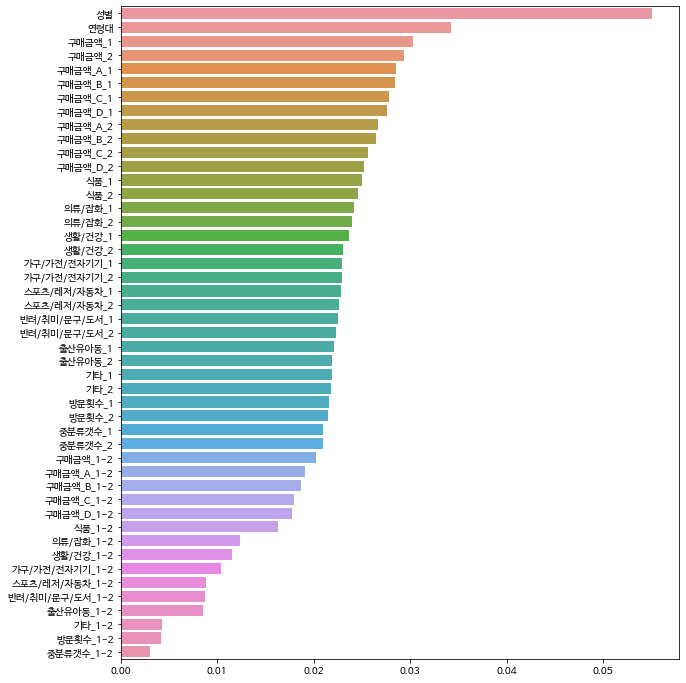

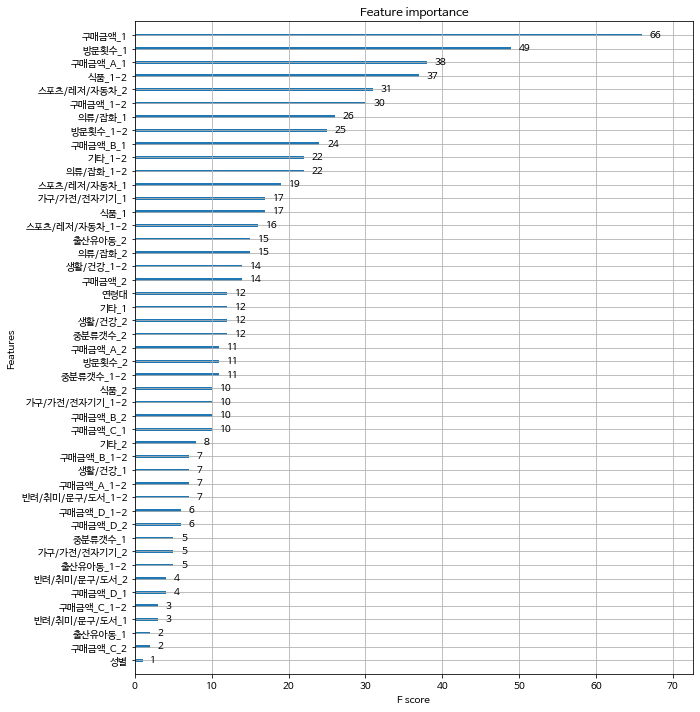

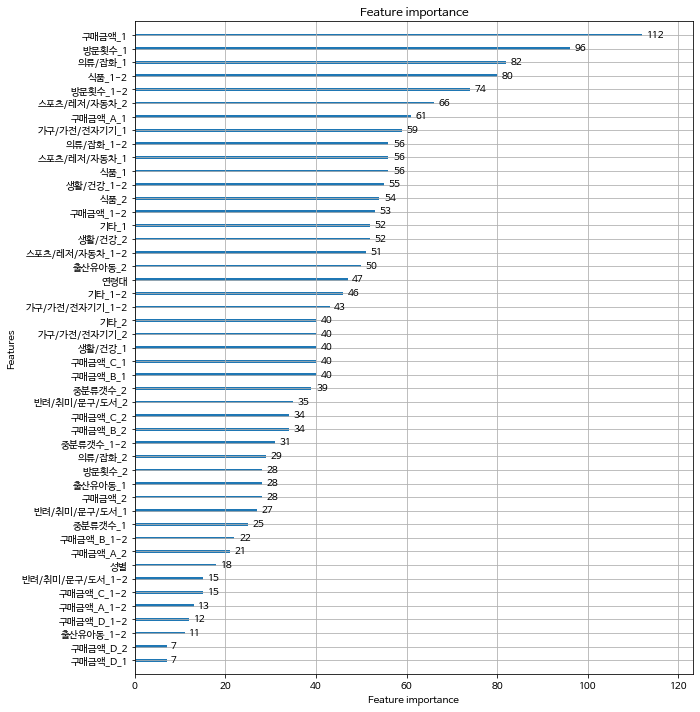

In [9]:
li = ['rf','xgb','lgbm']
for i in li:
  random_modeling(result_df.drop(['고객번호'],axis=1),i)

rf 정확도 :  0.695
rf 정밀도 :  0.6456
rf 재현율 :  0.5996
rf f1 :  0.6218
rf ROC_AUC :  0.7658
최적의 파라미터 : {'n_estimators': 621, 'min_samples_split': 5, 'min_samples_leaf': 20, 'max_features': 'log2', 'max_depth': 187, 'bootstrap': False}
최고의 정확도 : 0.6924336903472108
dt 정확도 :  0.6196
dt 정밀도 :  0.5449
dt 재현율 :  0.5459
dt f1 :  0.5454
dt ROC_AUC :  0.6091
최적의 파라미터 : {'min_samples_split': 3, 'min_samples_leaf': 80, 'max_features': 'auto', 'max_depth': 35, 'criterion': 'entropy'}
최고의 정확도 : 0.6662537695245747
xgb 정확도 :  0.7089
xgb 정밀도 :  0.6631
xgb 재현율 :  0.6171
xgb f1 :  0.6393
xgb ROC_AUC :  0.696
최적의 파라미터 : {'num_leaves': 96, 'n_estimators': 341, 'min_child_samples': 12, 'max_depth': 42, 'learning_rate': 0.01}
최고의 정확도 : 0.6646866102592992
lgbm 정확도 :  0.7034
lgbm 정밀도 :  0.6525
lgbm 재현율 :  0.6215
lgbm f1 :  0.6366
lgbm ROC_AUC :  0.7756
최적의 파라미터 : {'num_leaves': 66, 'n_estimators': 586, 'min_child_samples': 14, 'max_depth': 62, 'learning_rate': 0.01}
최고의 정확도 : 0.683358844554298


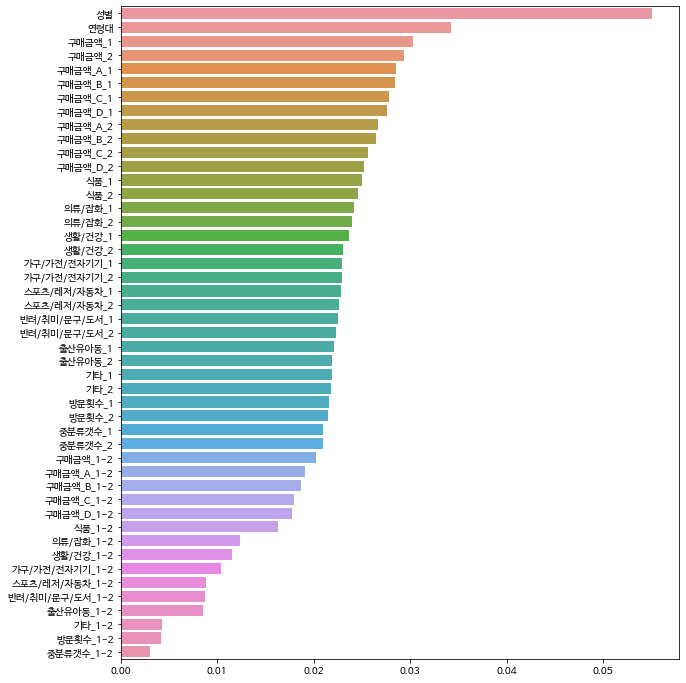

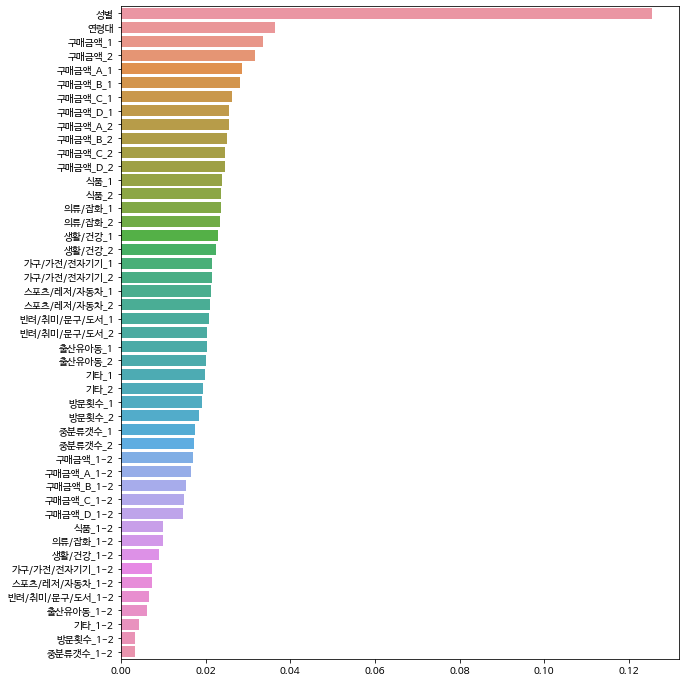

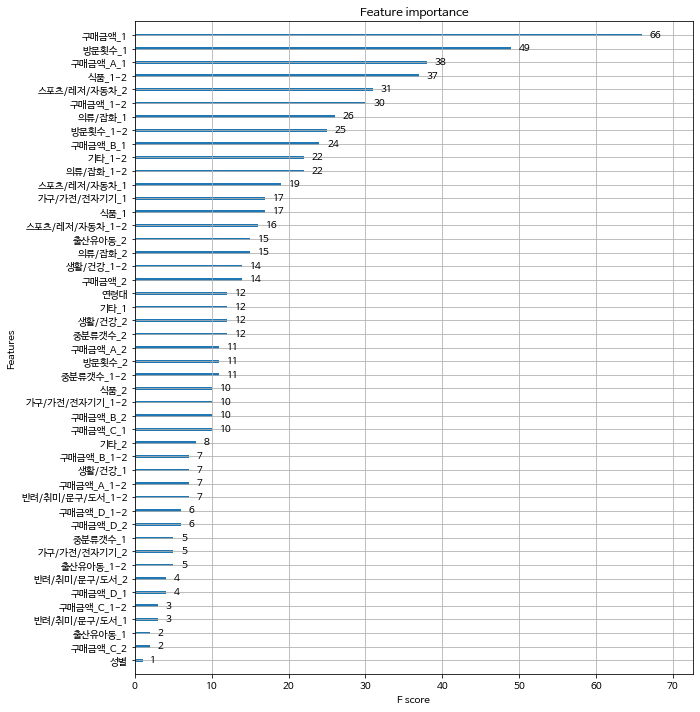

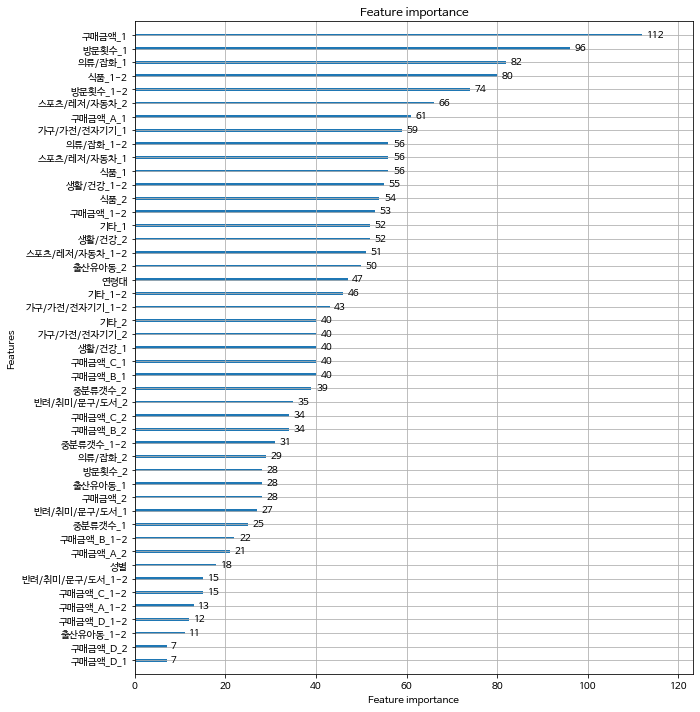

In [13]:
li = ['rf','dt','xgb','lgbm']
for i in li:
  random2_modeling(result_df.drop(['고객번호'],axis=1),i)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance as xgb_importance
from lightgbm import plot_importance as lgbm_importance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

def grid_modeling(data,model):

  y = data[['구매변동_1-4']]
  x = data.drop(['구매변동_1-4'],axis=1)



  X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

  rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
  dt_clf = DecisionTreeClassifier(random_state=0)
  lr_clf = LogisticRegression(random_state=0, n_jobs=-1)
  xgb_clf = XGBClassifier(random_state=0, n_jobs=-1)
  lgbm_clf = LGBMClassifier(random_state=0, n_jobs=-1)

  if model == 'rf':  
    
    rf_clf.fit(X_train,y_train)
    rf_pred = rf_clf.predict(X_test)
    accuracy = accuracy_score(y_test,rf_pred)
    print(model,'정확도 : ',round(accuracy,4))

    rf_clf_params ={
        'n_estimators':[210,215,220],
        'max_depth':[10,11,12,13,14],
        'min_samples_leaf':[20,40,60,80],
        'min_samples_split':[1,2,3,4,5]
    }

    rf_grid_cv = GridSearchCV(rf_clf, param_grid=rf_clf_params, scoring='accuracy', cv=2, n_jobs=-1)
    rf_grid_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',rf_grid_cv.best_params_)
    print('최고의 정확도 :',rf_grid_cv.best_score_)

    plt.rc('font',family='NanumBarunGothic')
    fig, ax = plt.subplots(figsize=(10, 12))
    sns.barplot(x=np.sort(rf_clf.feature_importances_)[::-1], y=data.drop(['구매변동_1-4'],axis=1).columns , ax=ax)

  elif model == 'dt':
    
    dt_clf.fit(X_train,y_train)
    dt_pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test,dt_pred)
    print(model,'정확도 : ',round(accuracy,4))

    dt_clf_params ={
        'max_features':['log2','sqrt','auto'],
        'criterion':['gini', 'entropy'],
        'max_depth':[20,25,30,35,40,45],
        'min_samples_leaf':[20,40,60,80],
        'min_samples_split':[1,2,3,4,5]
    }

    dt_grid_cv = GridSearchCV(dt_clf, param_grid=dt_clf_params, scoring='accuracy', cv=2, n_jobs=-1)
    dt_grid_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',dt_grid_cv.best_params_)
    print('최고의 정확도 :',dt_grid_cv.best_score_)

    plt.rc('font',family='NanumBarunGothic')
    fig, ax = plt.subplots(figsize=(10, 12))
    sns.barplot(x=np.sort(dt_clf.feature_importances_)[::-1], y=data.drop(['구매변동_1-4'],axis=1).columns , ax=ax)

  elif model == 'xgb':
    
    evals = [(X_test,y_test)]
    xgb_clf.fit(X_train,y_train,early_stopping_rounds=100, eval_metric='logloss',eval_set=evals,verbose=False)
    xgb_pred = xgb_clf.predict(X_test)
    accuracy = accuracy_score(y_test,xgb_pred)
    print(model,'정확도 : ',round(accuracy,4))

    xgb_clf_params ={
        'n_estimators':[190,200,210],
        'max_depth':[2,4,6,8,10],
        'min_samples_leaf':[20,40,60,80],
        'min_samples_split':[1,2,3,4,5]
    }

    xgb_grid_cv = GridSearchCV(xgb_clf, param_grid=xgb_clf_params, scoring='accuracy', cv=2, n_jobs=-1)
    xgb_grid_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',xgb_grid_cv.best_params_)
    print('최고의 정확도 :',xgb_grid_cv.best_score_)

    plt.rc('font',family='NanumBarunGothic')
    fig, ax = plt.subplots(figsize=(10, 12))
    xgb_importance(xgb_clf, ax=ax)

  elif model == 'lgbm':
    
    evals = [(X_test,y_test)]
    lgbm_clf.fit(X_train,y_train,early_stopping_rounds=100, eval_metric='logloss',eval_set=evals,verbose=False)
    lgbm_pred = lgbm_clf.predict(X_test)
    accuracy = accuracy_score(y_test,lgbm_pred)
    print(model,'정확도 : ',round(accuracy,4))

    lgbm_clf_params ={
        'n_estimators':[210,215,220],
        'max_depth':[10,11,12,13,14],
        'min_samples_leaf':[20,40,60,80],
        'min_samples_split':[1,2,3,4,5]
    }

    lgbm_grid_cv = GridSearchCV(lgbm_clf, param_grid=lgbm_clf_params, scoring='accuracy', cv=2, n_jobs=-1)
    lgbm_grid_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',lgbm_grid_cv.best_params_)
    print('최고의 정확도 :',lgbm_grid_cv.best_score_)

    plt.rc('font',family='NanumBarunGothic')
    fig, ax = plt.subplots(figsize=(10, 12))
    lgbm_importance(lgbm_clf, ax=ax)

  else :
    print('모델 인자 값을 확인하세요')

  

In [16]:
donut = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1016/donut1_3개_gap.csv',encoding='cp949',index_col=0)

rf 정확도 :  0.7253
최적의 파라미터 : {'max_depth': 13, 'min_samples_leaf': 40, 'min_samples_split': 2, 'n_estimators': 215}
최고의 정확도 : 0.7402232418526831
dt 정확도 :  0.6298
최적의 파라미터 : {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 80, 'min_samples_split': 2}
최고의 정확도 : 0.7343474431543742
xgb 정확도 :  0.7392
최적의 파라미터 : {'max_depth': 2, 'min_samples_leaf': 20, 'min_samples_split': 1, 'n_estimators': 200}
최고의 정확도 : 0.7383300016834713
lgbm 정확도 :  0.7376
최적의 파라미터 : {'max_depth': 12, 'min_samples_leaf': 20, 'min_samples_split': 1, 'n_estimators': 210}
최고의 정확도 : 0.7256643189796357


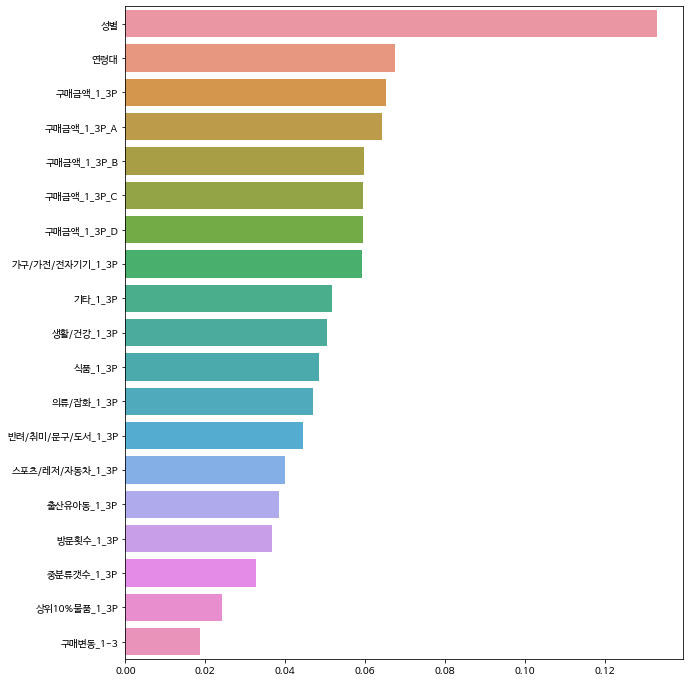

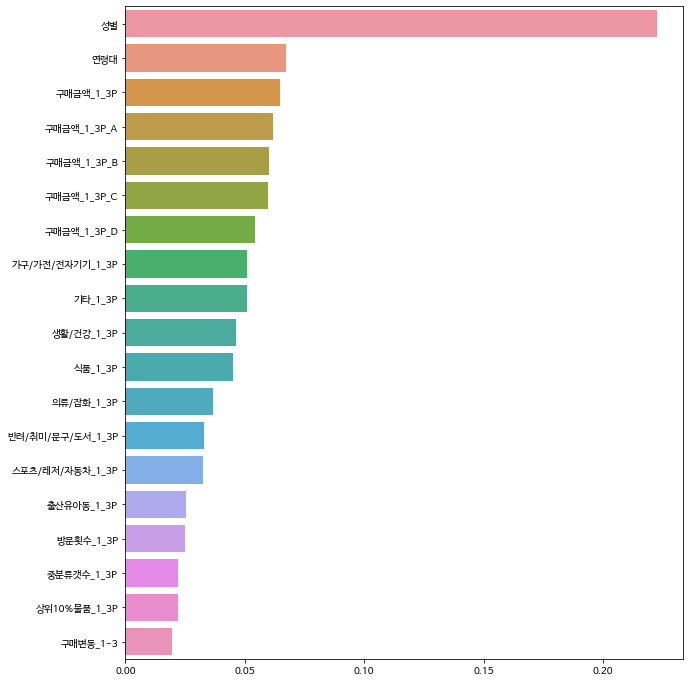

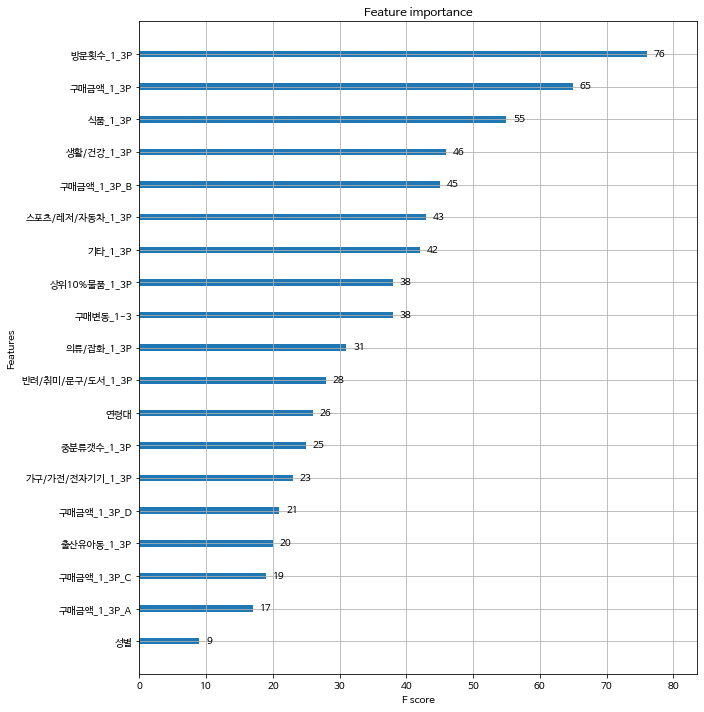

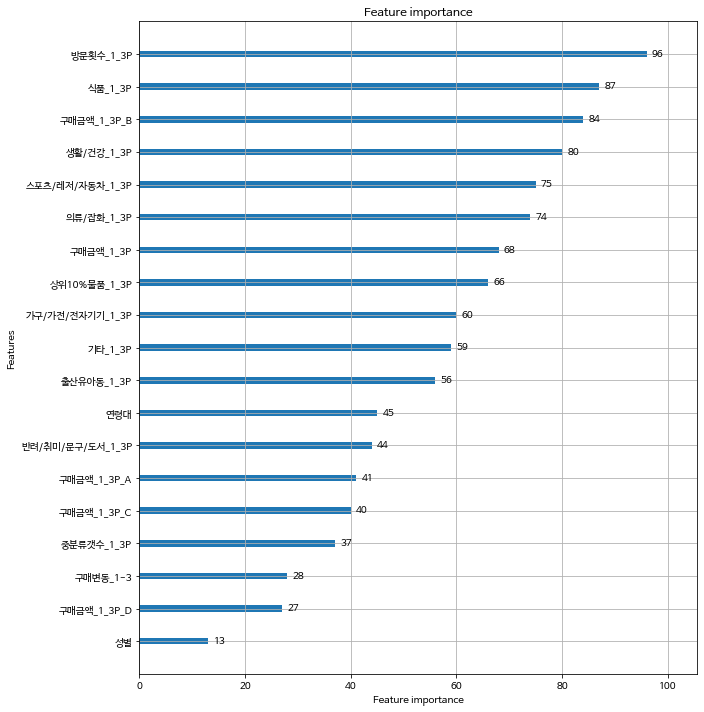

In [23]:
model_li = ['rf','dt','xgb','lgbm']
for z in model_li:
  grid_modeling(donut.drop('고객번호',axis=1),z)

In [87]:
ag_df = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1015/again_dataset.csv',encoding='cp949',index_col=0)

In [88]:
cat_df = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1016/sil_cat_dataset.csv',encoding='cp949',index_col=0)

In [89]:
plz_last_df = ag_df.merge(cat_df,how='left',on='고객번호')

In [90]:
plz_last_df.dropna(axis=0,inplace=True)

In [91]:
plz_last_df['유형'] = plz_last_df['유형'].astype(int)

In [95]:
plz_last_df.iloc[:,60:]

,중분류갯수_2,중분류갯수_3,중분류갯수_4,구매금액_1-2P,구매금액_1-3P,구매금액_2-3P,구매금액_A_1-2P,구매금액_A_1-3P,구매금액_A_2-3P,구매금액_B_1-2P,구매금액_B_1-3P,구매금액_B_2-3P,구매금액_C_1-2P,구매금액_C_1-3P,구매금액_C_2-3P,구매금액_D_1-2P,구매금액_D_1-3P,구매금액_D_2-3P,가구/가전/전자기기_1-2P,가구/가전/전자기기_1-3P,가구/가전/전자기기_2-3P,기타_1-2P,기타_1-3P,기타_2-3P,생활/건강_1-2P,생활/건강_1-3P,생활/건강_2-3P,식품_1-2P,식품_1-3P,식품_2-3P,의류/잡화_1-2P,의류/잡화_1-3P,의류/잡화_2-3P,반려/취미/문구/도서_1-2P,반려/취미/문구/도서_1-3P,반려/취미/문구/도서_2-3P,스포츠/레저/자동차_1-2P,스포츠/레저/자동차_1-3P,스포츠/레저/자동차_2-3P,출산유아동_1-2P,출산유아동_1-3P,출산유아동_2-3P,방문횟수_1-2P,방문횟수_1-3P,방문횟수_2-3P,중분류갯수_1-2P,중분류갯수_1-3P,중분류갯수_2-3P,유형
0,34,29,23,14190957,-2026990,-16217947,13637090,-2320460,-15957550,354340,186336,-168004,199527,107134,-92393,0,0,0,13654690,690600,-12964090,-521550,-1110950,-589400,3062480,3740,-3058740,-1667013,-1845420,-178407,1983010,1955720,-27290,0,0,0,0,0,0,0,0,0,118,74,-44,13,8,-5,1
2,22,16,23,191339,-258935,-450274,-80000,-80000,0,6960,0,-6960,264379,-178935,-443314,0,0,0,26900,0,-26900,0,0,0,98940,43040,-55900,157469,-210005,-367474,0,0,0,0,0,0,0,0,0,0,0,0,43,-128,-171,1,-5,-6,1
3,29,27,24,-784596,-1385169,-600573,-916740,-1457480,-540740,340680,253804,-86876,-208536,-181493,27043,0,0,0,404000,0,-404000,542500,172150,-370350,80760,-31620,-112380,-752076,190941,943017,-1283730,-1440340,-156610,0,0,0,211250,-340100,-551350,17900,69000,51100,-98,-7,91,5,3,-2,0
4,14,12,13,-3234420,-2525220,709200,-3218420,-2526770,691650,-16000,-16000,0,0,0,0,0,17550,17550,162400,-49900,-212300,-673510,-419460,254050,-358280,-409580,-51300,-1869680,-1307130,562550,-429270,-201870,227400,0,0,0,8120,-63080,-71200,0,0,0,-247,-254,-7,-4,-6,-2,0
14,25,32,32,-5485967,-1229440,4256527,-5588190,-1257070,4331120,218736,171060,-47676,-116513,-143430,-26917,0,0,0,0,0,0,-20200,-253070,-232870,46050,128160,82110,34763,-283710,-318473,-5456970,-676770,4780200,0,0,0,-89610,-146050,-56440,0,0,0,-36,7,43,1,8,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19117,29,27,28,-204375,-134284,70091,-58300,-58300,0,146640,-94930,-241570,-292715,18946,311661,0,0,0,-81210,78610,159820,40200,-11200,-51400,-41920,-103390,-61470,96115,71016,-25099,-72300,-60500,11800,-25320,-34930,-9610,-11240,-14060,-2820,-108700,-59830,48870,-66,-48,18,-3,-5,-2,5
19120,32,34,30,-2195812,-1750486,445326,0,0,0,0,186930,186930,-2195812,-1937416,258396,0,0,0,-77310,-76730,580,-7520,-67700,-60180,-143480,-195460,-51980,-1963212,-1447076,516136,-9220,-10100,-880,-35030,61060,96090,28020,-31620,-59640,11940,17140,5200,-140,-128,12,0,2,2,5
19121,17,13,9,-493458,-122838,370620,-397990,-554590,-156600,-95468,-335198,-239730,0,3130,3130,0,763820,763820,0,0,0,-14500,-24960,-10460,-4290,-7400,-3110,-358368,23982,382350,0,0,0,0,0,0,0,0,0,0,0,0,-84,-68,16,-4,-8,-4,5
19122,46,40,21,1855530,-1072727,-2928257,0,0,0,1821503,-1169119,-2990622,34027,96392,62365,0,0,0,9900,269000,259100,27100,33450,6350,-74620,-86300,-11680,1560990,-1621047,-3182037,76100,97700,21600,168940,254770,85830,-4320,-10250,-5930,91440,-10050,-101490,221,-224,-445,11,5,-6,2


In [68]:
cluster_1 = plz_last_df[plz_last_df['유형'] == 0]
cluster_2 = plz_last_df[plz_last_df['유형'] == 1]
cluster_3 = plz_last_df[plz_last_df['유형'] == 2]
cluster_4 = plz_last_df[plz_last_df['유형'] == 3]
cluster_5 = plz_last_df[plz_last_df['유형'] == 4]
cluster_6 = plz_last_df[plz_last_df['유형'] == 5]

In [111]:
new_df = pd.DataFrame()

In [112]:
mean_li = ['구매금액', '구매금액_A',
       '구매금액_B', '구매금액_C', '식품', '의류/잡화', '방문횟수', '중분류갯수']
for i in mean_li:
  new_df[f'{i}_증감평균'] = (plz_last_df[f'{i}_1-2P'] + plz_last_df[f'{i}_1-3P'] + plz_last_df[f'{i}_2-3P']) / 3

In [113]:
new_df['고객번호'] = plz_last_df['고객번호']
new_df['유형'] = plz_last_df['유형']

In [117]:
new_df['유형'].value_counts()

5    2391
1    1933
2    1922
0    1062
3     446
4     331
Name: 유형, dtype: int64

In [123]:
des_df = plz_last_df.groupby(['유형']).sum().reset_index()

In [126]:
des_df = des_df.iloc[:,:64]

In [129]:
des_df.columns

Index(['유형', '고객번호', '성별', '연령대', '구매금액_1', '구매금액_2', '구매금액_3', '구매금액_4',
       '구매금액_A_1', '구매금액_B_1', '구매금액_C_1', '구매금액_D_1', '구매금액_A_2', '구매금액_B_2',
       '구매금액_C_2', '구매금액_D_2', '구매금액_A_3', '구매금액_B_3', '구매금액_C_3', '구매금액_D_3',
       '구매금액_A_4', '구매금액_B_4', '구매금액_C_4', '구매금액_D_4', '가구/가전/전자기기_1',
       '가구/가전/전자기기_2', '가구/가전/전자기기_3', '가구/가전/전자기기_4', '기타_1', '기타_2', '기타_3',
       '기타_4', '생활/건강_1', '생활/건강_2', '생활/건강_3', '생활/건강_4', '식품_1', '식품_2',
       '식품_3', '식품_4', '의류/잡화_1', '의류/잡화_2', '의류/잡화_3', '의류/잡화_4',
       '반려/취미/문구/도서_1', '반려/취미/문구/도서_2', '반려/취미/문구/도서_3', '반려/취미/문구/도서_4',
       '스포츠/레저/자동차_1', '스포츠/레저/자동차_2', '스포츠/레저/자동차_3', '스포츠/레저/자동차_4',
       '출산유아동_1', '출산유아동_2', '출산유아동_3', '출산유아동_4', '방문횟수_1', '방문횟수_2',
       '방문횟수_3', '방문횟수_4', '중분류갯수_1', '중분류갯수_2', '중분류갯수_3', '중분류갯수_4'],
      dtype='object')

In [131]:
res_df = pd.DataFrame()

In [132]:
des_li = ['구매금액', '구매금액_A', '구매금액_B', '구매금액_C', '식품', '의류/잡화', '방문횟수', '중분류갯수']
for i in des_li:
  res_df[f'총_{i}'] = des_df[f'{i}_1'] + des_df[f'{i}_2'] + des_df[f'{i}_3'] + des_df[f'{i}_4']

In [144]:
res_df['방문당소비금액'] = res_df['총_구매금액'] / res_df['총_방문횟수']

In [146]:
res_df['인원'] = [1062,1933,1922,446,331,2391]

In [148]:
res_df['인원당소비금액'] = res_df['총_구매금액'] / res_df['인원']

In [153]:
res_df

,총_구매금액,총_구매금액_A,총_구매금액_B,총_구매금액_C,총_식품,총_의류/잡화,총_방문횟수,총_중분류갯수,방문당소비금액,인원,인원당소비금액
0,21876190016,12059614560,7346424562,2447017144,9267106891,5429964844,1577898,135447,13864.134447,1062,2.059905e+07
1,84345644686,71000668450,8982227402,4341178754,17200014656,43459581313,2605988,220735,32366.090974,1933,4.363458e+07
2,74442474142,57953718220,11435068197,4990461556,17487065818,34244132690,2892579,238327,25735.675376,1922,3.873178e+07
3,12638272228,9333255230,2456101250,833085448,4818826392,4024084309,618903,52613,20420.441051,446,2.833693e+07
4,8623777760,6042843820,2021391472,554129018,2852565834,2246725772,461269,40865,18695.767025,331,2.605371e+07
5,87527866911,64232505680,15684530332,7512687979,22192128680,36609735375,3587285,292242,24399.473951,2391,3.660722e+07


In [142]:
last_df = new_df.groupby(['유형'])[['구매금액_증감평균', '구매금액_A_증감평균', '구매금액_B_증감평균', '구매금액_C_증감평균', '식품_증감평균',
       '의류/잡화_증감평균', '방문횟수_증감평균', '중분류갯수_증감평균',]].mean().reset_index()

In [143]:
last_df

,유형,구매금액_증감평균,구매금액_A_증감평균,구매금액_B_증감평균,구매금액_C_증감평균,식품_증감평균,의류/잡화_증감평균,방문횟수_증감평균,중분류갯수_증감평균
0,0,-1.318175e+06,-9.879758e+05,-309117.043315,-23514.816698,-233693.266792,-5.909289e+05,-16.357815,-1.160075
1,1,-3.039278e+06,-2.809117e+06,-165230.499741,-66118.288326,-212723.989998,-1.919783e+06,-26.473530,-0.528367
2,2,-2.250308e+06,-1.963486e+06,-221223.226153,-65917.738120,-211221.758238,-1.270790e+06,-13.698578,0.176552
3,3,-3.399527e+06,-3.138293e+06,-258905.727952,-3949.400598,-270253.273543,-2.189371e+06,-14.532138,-0.626308
4,4,-1.450231e+06,-1.123241e+06,-235052.582075,-93784.938570,-308302.870091,2.187222e+05,-28.565962,-0.519637
5,5,-3.617834e+06,-2.406646e+06,-967071.993308,-241359.065105,-719181.362889,-1.312844e+06,-46.982574,-1.417817


In [92]:
result_df = plz_last_df.groupby(['유형'])[[ '구매금액_1', '구매금액_2', '구매금액_3', '구매금액_4', '구매금액_A_1',
       '구매금액_B_1', '구매금액_C_1', '구매금액_D_1', '구매금액_A_2', '구매금액_B_2', '구매금액_C_2',
       '구매금액_D_2', '구매금액_A_3', '구매금액_B_3', '구매금액_C_3', '구매금액_D_3', '구매금액_A_4',
       '구매금액_B_4', '구매금액_C_4', '구매금액_D_4', '가구/가전/전자기기_1', '가구/가전/전자기기_2',
       '가구/가전/전자기기_3', '가구/가전/전자기기_4', '기타_1', '기타_2', '기타_3', '기타_4',
       '생활/건강_1', '생활/건강_2', '생활/건강_3', '생활/건강_4', '식품_1', '식품_2', '식품_3',
       '식품_4', '의류/잡화_1', '의류/잡화_2', '의류/잡화_3', '의류/잡화_4', '반려/취미/문구/도서_1',
       '반려/취미/문구/도서_2', '반려/취미/문구/도서_3', '반려/취미/문구/도서_4', '스포츠/레저/자동차_1',
       '스포츠/레저/자동차_2', '스포츠/레저/자동차_3', '스포츠/레저/자동차_4', '출산유아동_1', '출산유아동_2',
       '출산유아동_3', '출산유아동_4', '방문횟수_1', '방문횟수_2', '방문횟수_3', '방문횟수_4', '중분류갯수_1',
       '중분류갯수_2', '중분류갯수_3', '중분류갯수_4']].mean().reset_index()

In [86]:
clu_li = [cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6]

for i in clu_li:
  print(i['연령대'].value_counts())
  print(i['성별'].value_counts())
  print('=======================================')

#1번 군집 = 30~50대
#2번 군집 = 50~60대
#3번 군집 = 30~40대 
#4번 군집 = 30~50대
#5번 군집 = 30~40대
#6번 군집 = 30~40대

3    469
4    259
2    222
5     64
1     48
Name: 연령대, dtype: int64
0    895
1    167
Name: 성별, dtype: int64
4    1495
5     438
Name: 연령대, dtype: int64
0    1625
1     308
Name: 성별, dtype: int64
3    1103
2     550
4     185
1      81
5       2
0       1
Name: 연령대, dtype: int64
0    1566
1     356
Name: 성별, dtype: int64
3    175
4    112
2    111
5     26
1     22
Name: 연령대, dtype: int64
0    371
1     75
Name: 성별, dtype: int64
3    120
2    100
4     70
5     25
1     15
0      1
Name: 연령대, dtype: int64
0    262
1     69
Name: 성별, dtype: int64
3    1429
2     783
1     153
4      23
0       3
Name: 연령대, dtype: int64
0    1943
1     448
Name: 성별, dtype: int64
